In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
%%time
!plink --bfile work/binary/h3a_wgs --pca --out output/pca/plink/h3a_wgs

PLINK v1.90b7 64-bit (16 Jan 2023)             www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to output/pca/plink/h3a_wgs.log.
Options in effect:
  --bfile work/binary/h3a_wgs
  --out output/pca/plink/h3a_wgs
  --pca

192825 MB RAM detected; reserving 96412 MB for main workspace.
1252340 variants loaded from .bim file.
386 people (0 males, 0 females, 386 ambiguous) loaded from .fam.
Ambiguous sex IDs written to output/pca/plink/h3a_wgs.nosex .
Using up to 15 threads (change this with --threads).
Before main variant filters, 386 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
1252340 variants and 386 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix 

In [3]:
vec = pd.read_table('output/pca/plink/h3a_wgs.eigenvec', header=None, sep='\s+', engine='python')
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,0.093592,0.009723,-0.043088,0.000323,-0.005085,0.050255,...,-0.085323,-0.043453,0.011542,-0.056800,-0.004629,-0.024886,-0.081536,-0.113551,0.091701,0.098972
1,H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,0.067200,0.006859,-0.007061,0.015771,-0.018522,0.026546,...,0.001353,-0.028462,-0.041034,-0.039860,-0.000918,0.058257,-0.006358,0.030699,-0.002782,-0.044072
2,H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,0.046533,-0.090492,0.007689,-0.028224,-0.043380,-0.055852,...,0.009442,-0.005870,0.007242,-0.034950,0.005484,-0.035543,0.089054,-0.057643,-0.070711,-0.010556
3,H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,-0.057242,0.033928,0.032195,-0.010065,0.013168,-0.013795,...,0.016108,-0.024910,-0.007408,0.000470,0.016086,0.013339,-0.001661,0.036067,-0.019752,0.009181
4,H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,0.103281,0.022483,-0.079042,0.026247,0.006138,0.093322,...,-0.050618,-0.136568,0.126337,0.025698,-0.098284,-0.012412,-0.039049,0.212650,0.143699,-0.239268


In [5]:
meta = pd.read_table('/data/vcf/h3awgs/samples.meta.tsv', index_col='SampleID')
meta.head()

,Country,EthnolinguisticGroup,Gender,PI,Project,sourcefile
SampleID,,,,,,
H3A-7C44F2,Guinea,Guinea,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-B4DD3C,Cote D'Ivoire,Cote D'Ivoire,Male,Fowler,Trypanogen,Trypanogen.tsv
H3A-31F23C,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-D3A6FE,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-0BF47F,Guinea,Guinea,Male,Fowler,Trypanogen,Trypanogen.tsv


In [17]:
vec[['Country', 'EthnolinguisticGroup']] = meta[['Country', "EthnolinguisticGroup"]].values
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,Country,EthnolinguisticGroup
0,H3A-7C44F2,H3A-7C44F2,-0.034223,0.058752,0.093592,0.009723,-0.043088,0.000323,-0.005085,0.050255,...,0.011542,-0.056800,-0.004629,-0.024886,-0.081536,-0.113551,0.091701,0.098972,Guinea,Guinea
1,H3A-B4DD3C,H3A-B4DD3C,-0.025685,0.064412,0.067200,0.006859,-0.007061,0.015771,-0.018522,0.026546,...,-0.041034,-0.039860,-0.000918,0.058257,-0.006358,0.030699,-0.002782,-0.044072,Cote D'Ivoire,Cote D'Ivoire
2,H3A-31F23C,H3A-31F23C,-0.063886,-0.024561,0.046533,-0.090492,0.007689,-0.028224,-0.043380,-0.055852,...,0.007242,-0.034950,0.005484,-0.035543,0.089054,-0.057643,-0.070711,-0.010556,Uganda,Uganda
3,H3A-D3A6FE,H3A-D3A6FE,-0.146803,-0.018440,-0.057242,0.033928,0.032195,-0.010065,0.013168,-0.013795,...,-0.007408,0.000470,0.016086,0.013339,-0.001661,0.036067,-0.019752,0.009181,Uganda,Uganda
4,H3A-0BF47F,H3A-0BF47F,-0.037333,0.059711,0.103281,0.022483,-0.079042,0.026247,0.006138,0.093322,...,0.126337,0.025698,-0.098284,-0.012412,-0.039049,0.212650,0.143699,-0.239268,Guinea,Guinea


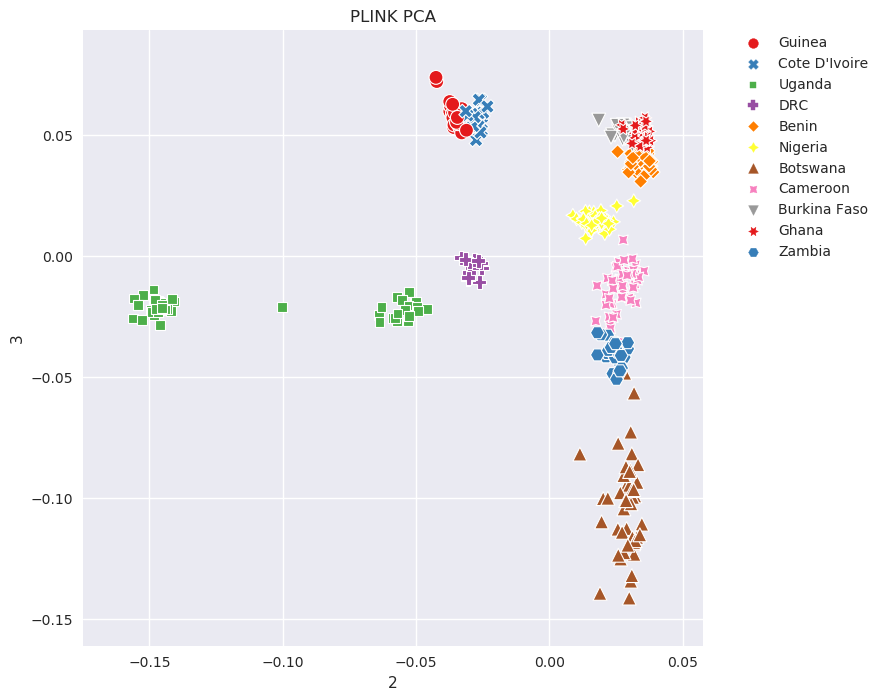

CPU times: user 1.5 s, sys: 216 ms, total: 1.72 s
Wall time: 1.52 s


In [42]:
%%time
plt.style.use("seaborn")
plt.figure(figsize=(8, 8))

plink_pca_plot = sns.scatterplot(
    x=vec.iloc[:,2],
    y=vec.iloc[:,3] ,
    data=vec, 
    hue=vec.iloc[:,22], 
    style=vec.iloc[:,22],
    palette="Set1",
    s=100
    )
plink_pca_plot.set_title('PLINK PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.savefig('output/plots/plink_pca.png', bbox_inches='tight')
plt.show()

In [22]:
kmeans = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=50,
    max_iter=500,
    random_state=42,
).fit(vec.iloc[:,[2,3]])
labels = kmeans.labels_
clusters = pd.DataFrame(kmeans.transform(vec.iloc[:,[2,3]]))
clusters[[5]] = pd.DataFrame(labels).values
clusters[[6]] = vec[['Country']].values
clusters.head()

Index([                     0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                           12,                     13,                     14,
                           15,                     16,                     17,
                           18,                     19,                     20,
                           21,              'Country', 'EthnolinguisticGroup'],
      dtype='object')


,0,1,2,3,4,5,6
0,0.137251,0.030524,0.102514,0.066259,0.176619,1,Guinea
1,0.147489,0.037764,0.102564,0.060902,0.179140,1,Cote D'Ivoire
2,0.082034,0.059403,0.090102,0.109132,0.123541,1,Uganda
3,0.002836,0.119475,0.173109,0.182391,0.196331,0,Uganda
4,0.135305,0.031373,0.105140,0.069506,0.178644,1,Guinea


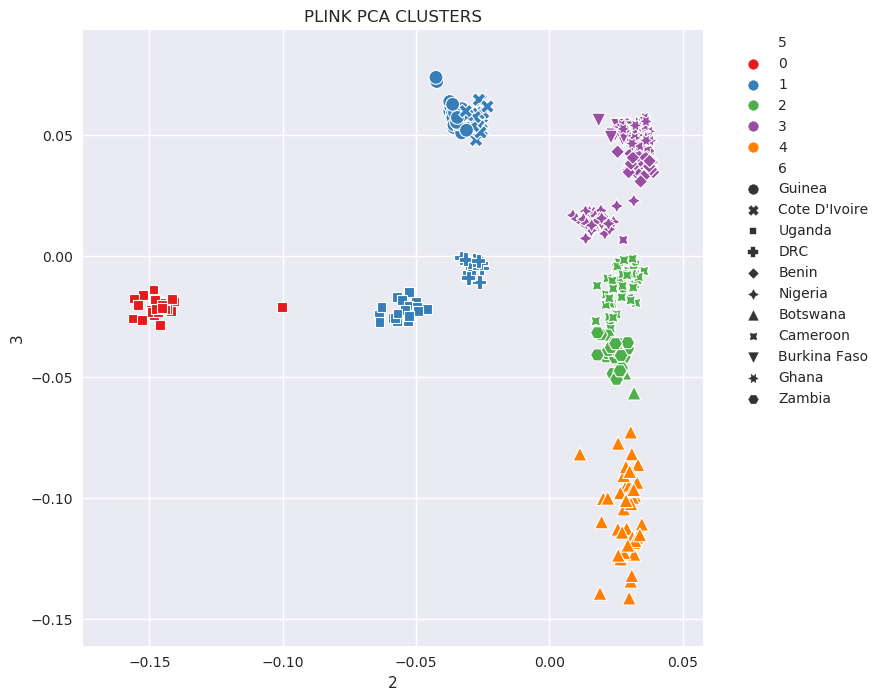

In [43]:
plt.style.use("seaborn")
plt.figure(figsize=(8, 8))

ped_cluster_plot = sns.scatterplot(
    x=vec.iloc[:,2],
    y=vec.iloc[:,3] ,
    data=vec, 
    hue=clusters.iloc[:,5], 
    style=clusters.iloc[:,6],
    palette="Set1",
    s=100
    )
ped_cluster_plot.set_title('PLINK PCA CLUSTERS')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.savefig('output/plots/plink_pca_clusters.png', bbox_inches='tight')
plt.show()

In [38]:
output = pd.DataFrame()
output[["FID", 'IID']] = vec[[0,1]]
output[["Cluster", 'Country']] = clusters[[5, 6]]
output.head()

,FID,IID,Cluster,Country
0,H3A-7C44F2,H3A-7C44F2,1,Guinea
1,H3A-B4DD3C,H3A-B4DD3C,1,Cote D'Ivoire
2,H3A-31F23C,H3A-31F23C,1,Uganda
3,H3A-D3A6FE,H3A-D3A6FE,0,Uganda
4,H3A-0BF47F,H3A-0BF47F,1,Guinea


In [41]:
output.to_csv('work/fst/cluster.tsv', sep='\t', columns=['FID', 'IID', 'Cluster'], header=False, index=False)
output.to_csv('work/fst/country.tsv', sep='\t', columns=['FID', 'IID', 'Country'], header=False, index=False)